In [1]:
import torch
import numpy as np

CREATION

In [3]:
# To create an empty tensor:
x = torch.empty(1) # give any dimensions eg = x; (x,y); (x,y,z); (p,q,r,s)
print(x)

x = torch.rand(2,2) # a random valued tensor
print(x)

x = torch.zeros(2,2) # zero valued tensor
print(x)

x = torch.ones(2,2, dtype=torch.int) # one valued tensor
print(x)
print(x.size()) # to print shape/size

tensor([-1.4131e-38])
tensor([[0.4630, 0.7778],
        [0.4913, 0.5367]])
tensor([[0., 0.],
        [0., 0.]])
tensor([[1, 1],
        [1, 1]], dtype=torch.int32)
torch.Size([2, 2])


In [4]:
# Create torch tensor from python list
x = torch.tensor([10.34, 4.75])
print(x)

tensor([10.3400,  4.7500])


BASIC OPERATIONS

In [7]:
x = torch.rand(2,2)
y = torch.rand(2,2)

z = x + y
print(z)
# or
z = torch.add(x, y)
print(z)
# in-place operations, in pytorch in-place operations can be determined by "_"
y.add_(x) # this will modify y tensor.
print(y)

# simimlarly, torch.sub, torch.div, torch.mul etc.

tensor([[1.0965, 0.8588],
        [0.9866, 1.7742]])
tensor([[1.0965, 0.8588],
        [0.9866, 1.7742]])
tensor([[1.0965, 0.8588],
        [0.9866, 1.7742]])


SLICING

In [9]:
x = torch.rand(5,3)
print(x)
print(x[:, 0])

tensor([[0.0112, 0.2087, 0.7695],
        [0.3967, 0.5818, 0.8789],
        [0.7758, 0.9055, 0.0750],
        [0.5277, 0.2321, 0.8348],
        [0.3132, 0.9311, 0.5115]])
tensor([0.0112, 0.3967, 0.7758, 0.5277, 0.3132])


In [10]:
# when you have only 1 element in your tensor, we can do this to get actual value:
print(x[1, 1].item())

0.5817717909812927


RESHAPING

In [11]:
x = torch.rand(4, 4)
print(x)

y = x.view(16) # number of elements must be same !
print(y)

y = x.view(-1, 8) # -1 indicates okay pytorch calculate 1st dim yourself, i want 2nd dim to be 8

tensor([[0.5057, 0.3594, 0.5016, 0.0699],
        [0.9506, 0.5339, 0.4988, 0.7699],
        [0.9599, 0.8566, 0.8641, 0.9499],
        [0.7621, 0.4866, 0.5395, 0.8142]])
tensor([0.5057, 0.3594, 0.5016, 0.0699, 0.9506, 0.5339, 0.4988, 0.7699, 0.9599,
        0.8566, 0.8641, 0.9499, 0.7621, 0.4866, 0.5395, 0.8142])


NUMPY TO TENSOR OR VICE-VERSA

In [14]:
# tensor to numpy array
a = torch.ones(5)
print(a)
b = a.numpy()
print(b)
print(type(b))

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]
<class 'numpy.ndarray'>


In [15]:
# numpy array to tensor
a = np.ones(5)
print(a)
b = torch.from_numpy(a)
print(b)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [17]:
x = torch.ones(5, requires_grad=True)
# required_grad is False by default,
# if True, it means that it tells torch it will need to calc. the gradients for this tensor later in our optimization steps.

AUTOGRAD - Gradient computation

In [19]:
x = torch.randn(3, requires_grad=True)
print(x)

tensor([ 0.6645, -0.1210, -0.2901], requires_grad=True)


In [25]:
y = x + 2
print(y)
# the "grad_fn" is created by torch as we mentioned "requires_grad=True", this basically creates gradients for backprop function.
# so to perform backprop on y, we can use grad_fn on y.
z = y*y*2
print(z)
z = z.mean()
print(z)

# now if we apply backprop on z:
z.backward() # dz/dx, we get these grads by "jacobian vectors and thier partial derivatives, chain rule"
# if z wasn't a scalar, then we would have to provide the same dim tensor as like "z", eg:
# v = torch.tensor([0.1, 1.0, 0.001], dtype=torch.float32)
# z.backward(v)
print(x.grad) # to get gradients values

tensor([2.6645, 1.8790, 1.7099], grad_fn=<AddBackward0>)
tensor([14.1991,  7.0614,  5.8477], grad_fn=<MulBackward0>)
tensor(9.0361, grad_fn=<MeanBackward0>)
tensor([14.2106, 10.0214,  9.1196])


In [ ]:
# methods to prevent "x" from tracking the gradients:
# x.requires_grad_(False)
# x.detach()
# with torch.no_grad():

In [32]:
# important things in training step:

weights = torch.ones(4, requires_grad=True)

for epoch in range(4):
    model_output = (weights*3).sum()
    model_output.backward()
    print(weights.grad)
    weights.grad.zero_() # to empty the gradients

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


BACKPROPAGATION

In [4]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)
w = torch.tensor(1.0, requires_grad=True)

# forward pass and compute the loss
y_hat = w * x
loss = (y_hat - y)**2

print(loss)

# backward pass
loss.backward()
print(w.grad)

# update the weights
# next forward and backward pass

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


AUTOGRAD AND GRADIENT DESCENT

In [6]:
# First with numpy

# Linear Regression Problem

# f = w*x ; f = 2*x i.e. w = 2
X = np.array([1,2,3,4], dtype=np.float32)
y = np.array([2,4,6,8], dtype=np.float32)

w = 0.0

# model prediction i.e. forward pass or scoring function
def forward(x):
    return w * x

# loss computation = MSE
def loss(y, y_hat):
    return ((y_hat - y)**2).mean()

# calculate gradient of loss w.r.t each parameter
# MSE = 1/N*(w*x-y)**2
# dJ/dw = 1/N*2*x*(w*x-y)
def gradient(x, y, y_hat):
    return np.dot(2*x, y_hat-y).mean()

print("Prediction before training: f(5) = {:.3f}".format(forward(5)))

# Training
learning_rate = 0.01
n_iters = 20

for epoch in range(n_iters):
    y_hat = forward(X)
    l = loss(y, y_hat)
    dw = gradient(X, y, y_hat)
    w = w - learning_rate*dw
    if epoch%2 == 0:
        print("epoch: {}: w = {:.3f}, loss = {:.8f}".format(epoch, w, l))

print("Prediction after training: f(5) = {:.3f}".format(forward(5)))

Prediction before training: f(5) = 0.000
epoch: 0: w = 1.200, loss = 30.00000000
epoch: 2: w = 1.872, loss = 0.76800019
epoch: 4: w = 1.980, loss = 0.01966083
epoch: 6: w = 1.997, loss = 0.00050331
epoch: 8: w = 1.999, loss = 0.00001288
epoch: 10: w = 2.000, loss = 0.00000033
epoch: 12: w = 2.000, loss = 0.00000001
epoch: 14: w = 2.000, loss = 0.00000000
epoch: 16: w = 2.000, loss = 0.00000000
epoch: 18: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


In [ ]:
# Now with PyTorch (gradients)

# f = w*x ; f = 2*x i.e. w = 2
X = torch.tensor([1,2,3,4], dtype=torch.float32)
y = torch.tensor([2,4,6,8], dtype=torch.float32)

w = torch.tensor(0.0, requires_grad=True, dtype=torch.float32)

# model prediction i.e. forward pass or scoring function
def forward(x):
    return w * x

# loss computation = MSE
def loss(y, y_hat):
    return ((y_hat - y)**2).mean()

print("Prediction before training: f(5) = {:.3f}".format(forward(5)))

# Training
learning_rate = 0.01
n_iters = 20

for epoch in range(n_iters):
    y_hat = forward(X)
    l = loss(y, y_hat)
    l.backward() # dloss/dw
    with torch.no_grad():
        w = w - learning_rate*w.grad # update weights
    # zero the gradients
    w.grad.zero_()
    if epoch%2 == 0:
        print("epoch: {}: w = {:.3f}, loss = {:.8f}".format(epoch, w, l))

print("Prediction after training: f(5) = {:.3f}".format(forward(5)))

In [11]:
# PyTorch training pipeline (forward, loss, gradient, optimizer)

# Training Pipeline :=>
# 1) Design Model (input, output, forward pass)
# 2) Construct loss and optimzer
# 3) Training loop :
#       -- forward pass : compute prediction/scoring function
#       -- calculate loss
#       -- backward pass : compute gradients
#       -- update weights

import torch.nn as nn

In [16]:
# X = torch.tensor([1,2,3,4], dtype=torch.float32)
# y = torch.tensor([2,4,6,8], dtype=torch.float32)
X = torch.tensor([[1],[2],[3],[4]], dtype=torch.float32)
y = torch.tensor([[2],[4],[6],[8]], dtype=torch.float32)

X_test = torch.tensor([5], dtype=torch.float32)

n_samples, n_features = X.shape
print(n_samples, n_features)

input_size = n_features
output_size = n_features

# model prediction i.e. forward pass or scoring function
# def forward(x):
#     return w * x

model = nn.Linear(input_size, output_size)

print("Prediction before training: f(5) = {:.3f}".format(model(X_test).item()))

# Training
learning_rate = 0.01
n_iters = 100

# loss computation = MSE
loss = nn.MSELoss()
# optimizer = torch.optim.SGD([w], lr=learning_rate)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n_iters):
    y_hat = model(X)
    l = loss(y, y_hat)
    l.backward() # dloss/dw
    optimizer.step()
    # zero the gradients
    optimizer.zero_grad()
    if epoch%10 == 0:
        [w, b] = model.parameters()
        print("epoch: {}: w = {:.3f}, loss = {:.8f}".format(epoch, w[0][0].item(), l))

print("Prediction after training: f(5) = {:.3f}".format(model(X_test).item()))

4 1
Prediction before training: f(5) = 3.849
epoch: 0: w = 0.775, loss = 9.54336452
epoch: 10: w = 1.485, loss = 0.45141166
epoch: 20: w = 1.609, loss = 0.20427784
epoch: 30: w = 1.638, loss = 0.18667367
epoch: 40: w = 1.652, loss = 0.17566046
epoch: 50: w = 1.662, loss = 0.16543232
epoch: 60: w = 1.672, loss = 0.15580316
epoch: 70: w = 1.682, loss = 0.14673464
epoch: 80: w = 1.692, loss = 0.13819385
epoch: 90: w = 1.701, loss = 0.13015029
Prediction after training: f(5) = 9.400


In [ ]:
# If we were to make our own custom model :=>

class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, ,self).__init__()
        # defining layers
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, X):
        return self.linear(X)

model = LinearRegression(input_size, output_size)

# This does the same thing as : model = nn.Linear(input_size, output_size)

LINEAR REGRESSION

In [2]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [ ]:
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        # layers
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, X):
        return self.linear(X)

In [31]:
# step 1: prepare data
X_np, y_np = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_np.astype(np.float32))
y = torch.from_numpy(y_np.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

# step 2: model
input_size = n_features
output_size = 1

model = LinearRegression(input_size, output_size)

# step 3: loss and optimizer
learning_rate = 0.01
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# step 4: training
n_epochs = 100
for epoch in range(n_epochs):
    # forward propagation
    y_pred = model(X)
    # compute loss
    l = loss(y, y_pred)
    # backward propagation and compute gradients
    l.backward()
    # update weights
    optimizer.step()
    # empy the gradients
    optimizer.zero_grad()

    if (epoch+1)%10 == 0:
        print("epoch: {}: loss = {:.8f}".format(epoch, l.item()))

epoch: 9: loss = 4344.65869141
epoch: 19: loss = 3243.06103516
epoch: 29: loss = 2445.77050781
epoch: 39: loss = 1868.12219238
epoch: 49: loss = 1449.20239258
epoch: 59: loss = 1145.12182617
epoch: 69: loss = 924.21795654
epoch: 79: loss = 763.61657715
epoch: 89: loss = 646.77465820
epoch: 99: loss = 561.71447754


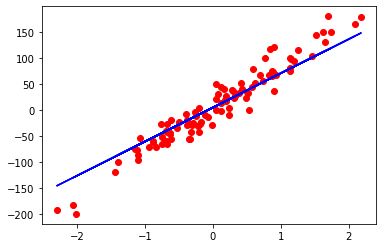

In [32]:
# plotting the training graph
y_preds = model(X).detach().numpy() # detaching so that pytorch doesn't include this step in it's computation graph
plt.plot(X_np, y_np, 'ro')
plt.plot(X_np, y_preds, 'b')
plt.show()

LOGISTIC REGRESSION

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [34]:
# step 1: prepare data
breastCancerData = datasets.load_breast_cancer()
X, y = breastCancerData.data, breastCancerData.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

scalar = StandardScaler() # scaling : 0 mean and 1 variance
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

In [36]:
# step 2: model

# f = w*x+b, followed by sigmoid function
class LogisticRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        # layer
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, X):
        return torch.sigmoid(self.linear(X))

input_size = n_features
output_size = 1

model = LogisticRegression(input_size, output_size)

In [38]:
# step 3: loss and optimizer
learning_rate = 0.01
loss = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# step 4: training
n_epochs = 100

for epoch in range(n_epochs):
    y_pred = model(X_train)
    l = loss(y_pred, y_train)
    l.backward()
    optimizer.step()
    optimizer.zero_grad()

    if (epoch+1)%10 == 0:
        print("epoch: {}: loss = {:.8f}".format(epoch, l.item()))

epoch: 9: loss = 0.60327399
epoch: 19: loss = 0.49055237
epoch: 29: loss = 0.41807005
epoch: 39: loss = 0.36836666
epoch: 49: loss = 0.33242160
epoch: 59: loss = 0.30527392
epoch: 69: loss = 0.28402448
epoch: 79: loss = 0.26689047
epoch: 89: loss = 0.25272787
epoch: 99: loss = 0.24077550


In [39]:
with torch.no_grad(): # to avoid grads calcs in torch computation graph
    y_preds = model(X_test)
    y_preds_classes = y_preds.round()
    accuracy = y_preds_classes.eq(y_test).sum() / float(y_test.shape[0])
    print("Accuracy = {:.4f}".format(accuracy))

Accuracy = 0.9211


PYTORCH DATASET AND DATALOADER

In [1]:
import math
import torchvision
from torch.utils.data import Dataset, DataLoader

In [43]:
class WineDataset(Dataset):
    def __init__(self):
        # data loading
        data = np.loadtxt("/content/sample_data/wine.csv", delimiter=",", dtype=np.float32, skiprows=1)
        self.X = torch.from_numpy(data[:, 1:])
        self.Y = torch.from_numpy(data[:, [0]])
        self.n_samples = data.shape[0]
    
    def __getitem__(self, index):
        # for indexing, dataset[0]
        return self.X[index], self.Y[index]
    
    def __len__(self):
        # len(dataset)
        return self.n_samples

In [53]:
dataset = WineDataset()
dataloader = DataLoader(dataset=dataset, batch_size=4, shuffle=True, num_workers=2)

# training
n_epochs = 2
batch_size = 4
total_samples = len(dataset)
n_iters = math.ceil(total_samples/batch_size)

for epoch in range(n_epochs):
    for i, (inputs, labels) in enumerate(dataloader):
        # calculations
        if (i+1)%5 == 0:
            print("epoch {}/{}, step {}/{}, inputs {}".format(epoch+1, n_epochs, i+1, n_iters, inputs.shape))

epoch 1/2, step 5/45, inputs torch.Size([4, 13])
epoch 1/2, step 10/45, inputs torch.Size([4, 13])
epoch 1/2, step 15/45, inputs torch.Size([4, 13])
epoch 1/2, step 20/45, inputs torch.Size([4, 13])
epoch 1/2, step 25/45, inputs torch.Size([4, 13])
epoch 1/2, step 30/45, inputs torch.Size([4, 13])
epoch 1/2, step 35/45, inputs torch.Size([4, 13])
epoch 1/2, step 40/45, inputs torch.Size([4, 13])
epoch 1/2, step 45/45, inputs torch.Size([2, 13])
epoch 2/2, step 5/45, inputs torch.Size([4, 13])
epoch 2/2, step 10/45, inputs torch.Size([4, 13])
epoch 2/2, step 15/45, inputs torch.Size([4, 13])
epoch 2/2, step 20/45, inputs torch.Size([4, 13])
epoch 2/2, step 25/45, inputs torch.Size([4, 13])
epoch 2/2, step 30/45, inputs torch.Size([4, 13])
epoch 2/2, step 35/45, inputs torch.Size([4, 13])
epoch 2/2, step 40/45, inputs torch.Size([4, 13])
epoch 2/2, step 45/45, inputs torch.Size([2, 13])


SOFTMAX ACTIVATION FUNCTION AND CROSSENTROPY LOSS

In [6]:
# Activation functions : actvation functions apply a non-linear transformation and decide whether a neuron should be activated or not.
# softmax activation function :- squashes the output to be between 0 and 1 so we get probabilities.

# implementing softmax activation function in numpy
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

x = np.array([2.0, 1.0, 0.1])
outputs = softmax(x)
print(outputs)

# implementing softmax activation function in pytorch
x = torch.tensor([2.0, 1.0, 0.1])
outputs = torch.softmax(x, dim=0)
print(outputs)

[0.65900114 0.24243297 0.09856589]
tensor([0.6590, 0.2424, 0.0986])


In [10]:
# Crossentropy Loss :- this measures the performance of our CLASSIFICATION MODEL whose output is a probability btw 0 and 1.
# It can be used in multiclass problems.
# CEL(y_pred, y) = -(1/N)*np.sum(y*np.log(y_pred))

# In Numpy

def cross_entropy_loss(y, y_pred):
    return -np.sum(y*np.log(y_pred))

# y must be one-hot encoded; i.e. 
# if class 0, y = [1,0,0]
# if class 1, y = [0,1,0]
# if class 2, y = [0,0,1]
y = np.array([1,0,0])

# y_pred has probabilities
y_pred_good = np.array([0.7,0.2,0.1])
y_pred_bad = np.array([0.1,0.3,0.6])

l1 = cross_entropy_loss(y, y_pred_good)
l2 = cross_entropy_loss(y, y_pred_bad)

print("loss 1: {:.4f}".format(l1))
print("loss 2: {:.4f}".format(l2))

# In PyTorch

loss = nn.CrossEntropyLoss() 
# this loss already applies nn.LogSoftmax + nn.NLLLoss (neg log likelihood loss)
# so we must not implement softmax layer ourselves.
# Also for this nn.CrossEntropyLoss(), Y has class labels, not one-hot and y_pred has raw scores(logits) no softmax.

y = torch.tensor([0])
# nsamples*nclasses = 1x3

y_pred_good = torch.tensor([[2.0, 1.0, 0.1]])
y_pred_bad = torch.tensor([[0.5, 2.0, 0.3]])

l1 = loss(y_pred_good, y)
l2 = loss(y_pred_bad, y)

print("loss 1: {:.4f}".format(l1))
print("loss 2: {:.4f}".format(l2))

_, pred1 = torch.max(y_pred_good, 1)
_, pred2 = torch.max(y_pred_bad, 1)

print(pred1)
print(pred2)

loss 1: 0.3567
loss 2: 2.3026
loss 1: 0.4170
loss 2: 1.8406
tensor([0])
tensor([1])


NEURAL NETWORKS

In [12]:
import torch
import torch.nn as nn
import torchvision # for datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [ ]:
# device config
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# hyperparameters
input_size = 784 # 28x28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# MNIST data
train_dataset = torchvision.datasets.MNIST(
    root="./",
    train=True,
    transform=transforms.ToTensor(),
    download=True
)

test_dataset = torchvision.datasets.MNIST(
    root="./",
    train=False,
    transform=transforms.ToTensor()
)

# Dataloader
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False
)

examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)

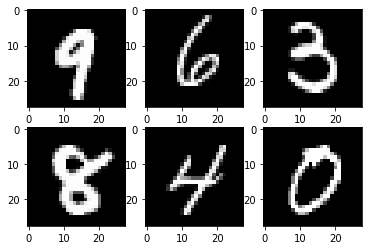

In [24]:
# plotting samples
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [27]:
# model
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        # layers
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, X):
        out = self.linear1(X)
        out = self.relu(out)
        out = self.linear2(out)
        # out = self.sigmoid(out) # as this is a multiclass problem, don't apply softmax fun
        return out

model = NeuralNetwork(input_size, hidden_size, num_classes)

# loss and optimizer
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# training
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # forward prop
        y_pred = model(images)
        # compute loss
        l = loss(y_pred, labels)
        # backward prop
        l.backward()
        # weights update
        optimizer.step()
        optimizer.zero_grad()

        if (i+1)%100 == 0:
            print("epoch {}/{}, step {}/{}, loss = {:.8f}".format(epoch+1, num_epochs, i+1, n_total_steps, l.item()))

epoch 1/2, step 100/600, loss = 0.54439235
epoch 1/2, step 200/600, loss = 0.30515817
epoch 1/2, step 300/600, loss = 0.29702604
epoch 1/2, step 400/600, loss = 0.16601175
epoch 1/2, step 500/600, loss = 0.11688229
epoch 1/2, step 600/600, loss = 0.19543718
epoch 2/2, step 100/600, loss = 0.28708392
epoch 2/2, step 200/600, loss = 0.08348958
epoch 2/2, step 300/600, loss = 0.20402947
epoch 2/2, step 400/600, loss = 0.23433864
epoch 2/2, step 500/600, loss = 0.24089774
epoch 2/2, step 600/600, loss = 0.31893793


In [30]:
# testing
with torch.no_grad():

    n_correct = 0
    n_samples = 0

    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)

        _, preds = torch.max(outputs, 1) # value, index
        n_samples += labels.shape[0]
        n_correct += (preds == labels).sum().item()
    
    accuracy = 100*(n_correct/n_samples)
    print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 95.51


CONVOLUTIONAL NEURAL NETWORKS

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
num_epochs = 5
batch_size = 4
learning_rate = 0.001

# dataset has PILImage images of range [0, 1]. 
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 14, 14
        x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 5, 5
        x = x.view(-1, 16 * 5 * 5)            # -> n, 400
        x = F.relu(self.fc1(x))               # -> n, 120
        x = F.relu(self.fc2(x))               # -> n, 84
        x = self.fc3(x)                       # -> n, 10
        return x


model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')